[*********************100%%**********************]  1 of 1 completed


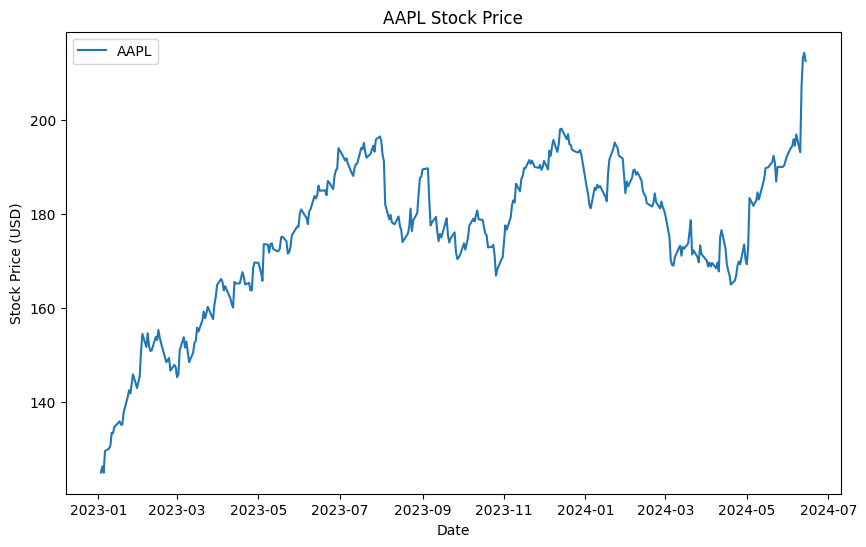

[*********************100%%**********************]  1 of 1 completed


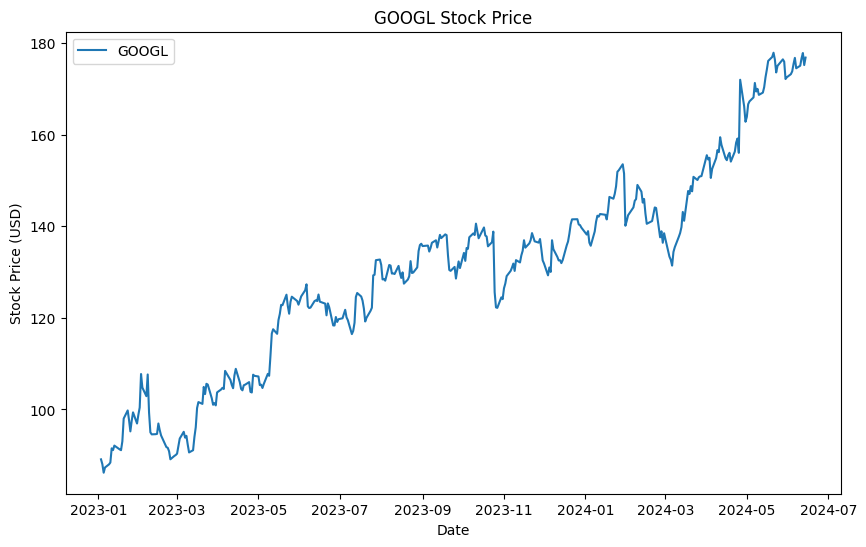

[*********************100%%**********************]  1 of 1 completed


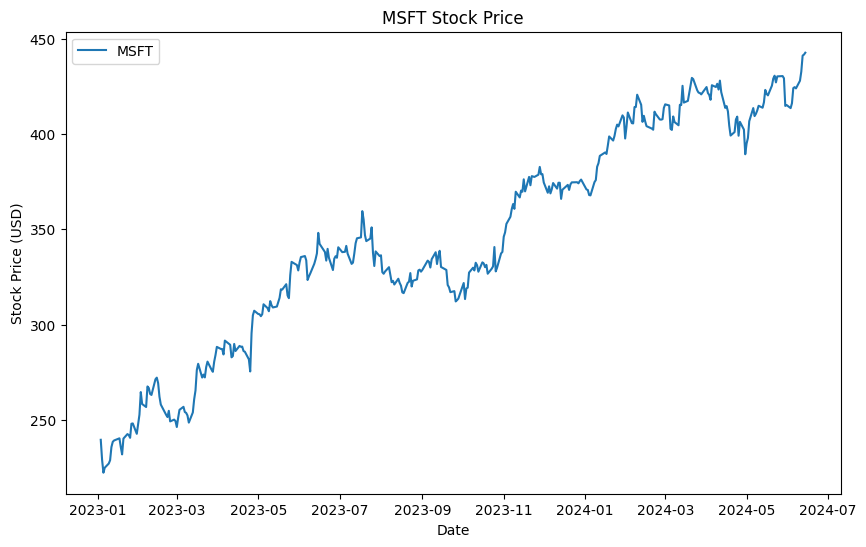

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Portfolio Value: $3363.10


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
def plot_stock_data(stock_data, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label=ticker)
    plt.title(f'{ticker} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.show()
def calculate_portfolio_value(portfolio):
    total_value = 0
    for stock, quantity in portfolio.items():
        stock_data = get_stock_data(stock, start_date, end_date)
        latest_price = stock_data['Close'].iloc[-1]
        total_value += latest_price * quantity
    return total_value
portfolio = {'AAPL': 5, 'GOOGL': 3, 'MSFT': 4}
start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Plot individual stocks
for stock, quantity in portfolio.items():
    stock_data = get_stock_data(stock, start_date, end_date)
    plot_stock_data(stock_data, stock)

# Plot overall portfolio value
portfolio_value = calculate_portfolio_value(portfolio)
print(f'Portfolio Value: ${portfolio_value:.2f}')


In [ ]:
!pip install Flask Flask-SQLAlchemy finance
!pip install yfinance pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for finance: filename=finance-0.2502-py3-none-any.whl size=46534 sha256=98c392cfe861645d582b245849d44be73adb640cda3ee185f43813e34b31d4c5
  Stored in directory: /root/.cache/pip/wheels/be/99/d3/bd0c942c471c5fb446581cd524719e967eb613bc2359f69f0e
Successfully built finance


In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
portfolio = {
    'Ticker' : ['Ashoka.NS', 'Goenka.NS', 'UnionBank.NS', 'Reliance.NS'],
    'Shares' : [1000,1500,4000,900]
}

In [ ]:
portfolio_df = pd.DataFrame(portfolio)

In [ ]:
def fetch_current_prices(tickers) :
  prices = []
  for ticker in tickers:
    stock = yf.Ticker(ticker)
    try:
      prices.append(stock.history(period='1d')['Close'][0])
    except IndexError:
      prices.append(float('nan'))
  return prices

In [ ]:
portfolio_df['Current Price'] = fetch_current_prices(portfolio_df['Ticker'])
portfolio_df['Total Value'] = portfolio_df['Shares'] * portfolio_df['Current Price']
total_portfolio_value = portfolio_df['Total Value'].sum()
print(portfolio_df)
print(f'\nTotal Portfolio Value: ${total_portfolio_value: .2f}')

         Ticker  Shares  Current Price   Total Value
0     Ashoka.NS    1000     235.619995  2.356200e+05
1     Goenka.NS    1500       1.060000  1.590000e+03
2  UnionBank.NS    4000     136.179993  5.447200e+05
3   Reliance.NS     900    3104.850098  2.794365e+06

Total Portfolio Value: $ 3576295.05
